In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
import numpy as np

In [8]:
def initialize_s(qc, qubits):
    """Apply Hadamard gates to all qubits"""
    for q in qubits:
        qc.h(q)
    return qc


In [9]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    # Apply H gates to all qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    
    # Apply X gates to all qubits
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply multi-controlled Z gate
    qc.h(nqubits-1)
    qc.ccx(0, 1, nqubits-1)  # Use CCX (Toffoli) gate for 3 qubits
    for qubit in range(2, nqubits-1):
        qc.cx(qubit, nqubits-1)
    qc.ccx(0, 1, nqubits-1)
    qc.h(nqubits-1)
    
    # Apply X gates to all qubits
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply H gates to all qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    
    return qc

In [10]:
def grover_algorithm(oracle, n):
    # Initialize quantum and classical registers
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # Initialize superposition
    initialize_s(qc, qr)

    # Number of iterations
    iterations = int(np.pi/4 * np.sqrt(2**n))

    # Grover iteration
    for _ in range(iterations):
        qc.append(oracle, qr)
        qc.append(diffuser(n), qr)

    # Measure
    qc.measure(qr, cr)

    return qc
    

In [11]:
# Example usage (you'll need to define your own oracle)
def example_oracle():
    # This is just a placeholder. You'll need to implement actual oracles.
    qc = QuantumCircuit(3)
    qc.cz(0, 2)
    return qc

Counts: {'001': 83, '110': 62, '101': 64, '100': 55, '000': 57, '010': 61, '011': 61, '111': 57}


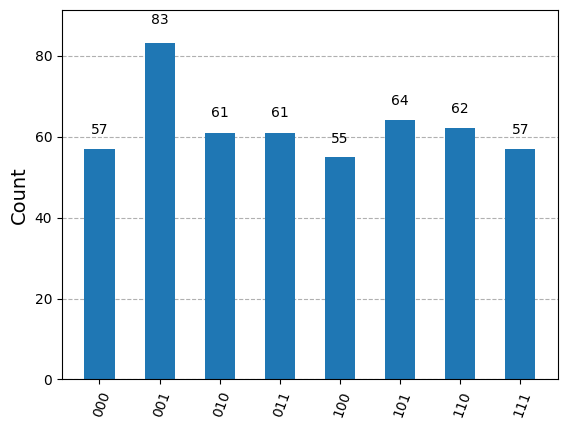

In [13]:
# Create and run the circuit
oracle = example_oracle()
n = 3  # number of qubits
grover_circuit = grover_algorithm(oracle, n)

# Transpile and run
simulator = AerSimulator()
transpiled_qc = transpile(grover_circuit, simulator)
job = simulator.run(transpiled_qc, shots=500)

result = job.result()
counts = result.get_counts()

print("Counts:", counts)

plot_histogram(counts)